# Load Library

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [130]:
from tqdm import tqdm
import os
import data_utils
import model_utils
from attack_utils import get_CSMIA_case_by_case_results, CSMIA_attack, LOMIA_attack
from data_utils import oneHotCatVars, filter_random_data_by_conf_score
from vulnerability_score_utils import get_vulnerability_score, draw_hist_plot
from experiment_utils import MIAExperiment
from disparity_inference_utils import get_confidence_array, draw_confidence_array_scatter, get_indices_by_group_condition, get_corr_btn_sens_and_out_per_subgroup, get_slopes, get_angular_difference, calculate_stds
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network._base import ACTIVATIONS
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import pickle
# import utils
import copy

import matplotlib as mpl

# Setting the font family, size, and weight globally
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.weight'] = 'light'

In [146]:
experiment = MIAExperiment(sampling_condition_dict_list = 
    {
            'subgroup_col_name': 'ST',
    }, shortname = f"Corr_btn_sens_and_output_for_ST_ranging_from_0_to_-0.5"
)

  2%|▏         | 1/51 [00:01<01:07,  1.35s/it]

before scaling: 505 392 1.288265306122449
after scaling: 392 392 1.0
before scaling: 496 125 3.968
after scaling: 125 125 1.0


  6%|▌         | 3/51 [00:03<01:03,  1.31s/it]

before scaling: 486 253 1.9209486166007905
after scaling: 253 253 1.0


 14%|█▎        | 7/51 [00:09<00:57,  1.30s/it]

before scaling: 466 219 2.127853881278539
after scaling: 219 219 1.0


 22%|██▏       | 11/51 [00:14<00:52,  1.30s/it]

before scaling: 447 336 1.3303571428571428
after scaling: 336 336 1.0


 24%|██▎       | 12/51 [00:15<00:50,  1.30s/it]

before scaling: 442 164 2.6951219512195124
after scaling: 164 164 1.0


 29%|██▉       | 15/51 [00:19<00:46,  1.30s/it]

before scaling: 427 314 1.3598726114649682
after scaling: 314 314 1.0


 31%|███▏      | 16/51 [00:20<00:45,  1.31s/it]

before scaling: 422 300 1.4066666666666667
after scaling: 300 300 1.0


 37%|███▋      | 19/51 [00:24<00:41,  1.30s/it]

before scaling: 594 566 1.0494699646643109
after scaling: 566 566 1.0
before scaling: 407 163 2.496932515337423
after scaling: 163 163 1.0


 47%|████▋     | 24/51 [00:31<00:35,  1.30s/it]

before scaling: 383 274 1.397810218978102
after scaling: 274 274 1.0


 51%|█████     | 26/51 [00:33<00:32,  1.30s/it]

before scaling: 628 469 1.3390191897654584
after scaling: 469 469 1.0
before scaling: 373 126 2.9603174603174605
after scaling: 126 126 1.0


 53%|█████▎    | 27/51 [00:35<00:31,  1.30s/it]

before scaling: 368 187 1.967914438502674
after scaling: 187 187 1.0


 57%|█████▋    | 29/51 [00:37<00:28,  1.30s/it]

before scaling: 358 294 1.217687074829932
after scaling: 294 294 1.0


 61%|██████    | 31/51 [00:40<00:25,  1.30s/it]

before scaling: 349 316 1.1044303797468353
after scaling: 316 316 1.0


 67%|██████▋   | 34/51 [00:44<00:22,  1.30s/it]

before scaling: 667 493 1.3529411764705883
after scaling: 492 493 0.9979716024340771
before scaling: 334 120 2.783333333333333
after scaling: 120 120 1.0


 76%|███████▋  | 39/51 [00:50<00:15,  1.31s/it]

before scaling: 309 260 1.1884615384615385
after scaling: 260 260 1.0


 80%|████████  | 41/51 [00:53<00:13,  1.30s/it]

before scaling: 701 357 1.9635854341736694
after scaling: 357 357 1.0
before scaling: 300 76 3.9473684210526314
after scaling: 76 76 1.0


 88%|████████▊ | 45/51 [00:58<00:07,  1.30s/it]

before scaling: 721 325 2.2184615384615385
after scaling: 325 325 1.0
before scaling: 280 101 2.772277227722772
after scaling: 101 101 1.0


 94%|█████████▍| 48/51 [01:02<00:03,  1.30s/it]

before scaling: 736 697 1.0559540889526542
after scaling: 697 697 1.0
before scaling: 265 171 1.5497076023391814
after scaling: 171 171 1.0


 98%|█████████▊| 50/51 [01:05<00:01,  1.30s/it]

before scaling: 746 326 2.2883435582822087
after scaling: 326 326 1.0
before scaling: 255 87 2.9310344827586206
after scaling: 87 87 1.0


100%|██████████| 51/51 [01:06<00:00,  1.30s/it]


[1000, 1000, 776, 252, 1000, 1000, 1000, 520, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 469, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 751, 1000, 371, 1000, 1000, 1000, 1000, 1000, 735, 1000, 710, 1000, 1000, 1000, 1000, 952, 400, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 715, 1000, 1000, 746, 337, 1000, 508, 1000, 1000, 1000, 821, 1000, 1000, 1000, 905, 1000, 1000, 1000, 1000, 738, 359, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 841, 1000, 1000, 509, 253, 1000, 1000, 1000, 1000, 1000, 1000, 450, 360, 1000, 1000, 1000, 1000, 947, 645, 1000, 1000, 436, 341]


In [147]:
save_model = True

print(f"Training classifier for experiment: {experiment}")
try:
    experiment.clf = model_utils.load_model(f'<PATH_TO_MODEL>/{experiment.ds.ds.filenameroot}_target_model.pkl')
    print(f"Loaded classifier for experiment from file: {experiment}")
except:
    # clf = model_utils.get_model(max_iter=500, hidden_layer_sizes=(256, 256))
    experiment.clf = model_utils.get_model(max_iter=500)
    experiment.clf.fit(experiment.X_train, experiment.y_tr_onehot)

    if save_model:
        model_utils.save_model(experiment.clf, f'<PATH_TO_MODEL>/{experiment.ds.ds.filenameroot}_target_model.pkl')

Training classifier for experiment: Census19_subgroup_col_name_ST
Loaded classifier for experiment from file: Census19_subgroup_col_name_ST


In [148]:
for experiment_key in experiments:
    experiment = experiments[experiment_key]
    experiment.confidence_array = get_confidence_array(experiment, experiment.X_train, experiment.y_te, experiment.clf)
    _, case_indices = CSMIA_attack(experiment.clf, experiment.X_train, experiment.y_tr, experiment.ds.ds.meta)
    case_2_indices = case_indices[2]
    experiment.confidence_array_case_2 = experiment.confidence_array[case_2_indices, :]
    experiment.X_case_2 = experiment.X_train.loc[case_2_indices].copy().reset_index(drop=True)
    experiment.y_case_2 = experiment.y_tr.ravel()[case_2_indices]

In [149]:
correlation_vs_ang_diff = {}
for i in range(50):
    condition = {'ST': i}
    fcondition = f'{condition}'
    correlation = get_corr_btn_sens_and_out_per_subgroup(experiment, experiment.X_train, experiment.y_tr, condition)
    indices = get_indices_by_group_condition(experiment.X_case_2, condition)
    angular_difference = get_angular_difference(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices])
    correlation_vs_ang_diff[fcondition] = {}
    correlation_vs_ang_diff[fcondition]['correlation'] = correlation
    correlation_vs_ang_diff[fcondition]['angular_difference'] = angular_difference


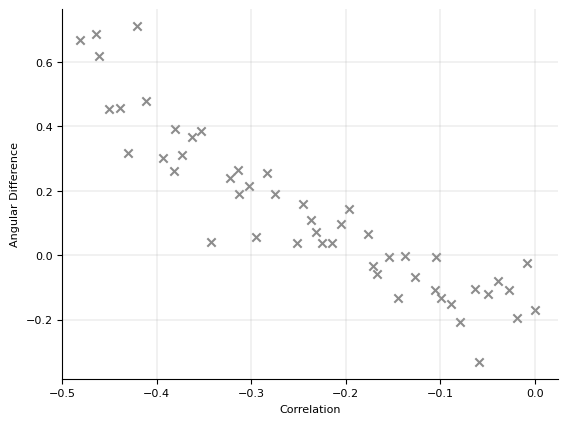

In [150]:
correlation_vs_ang_diff_df = pd.DataFrame.from_dict(correlation_vs_ang_diff, orient='index')
arr = correlation_vs_ang_diff_df[['correlation', 'angular_difference']].to_numpy()

x_values = [item[0] for item in arr]
y_values = [item[1] for item in arr]

# Creating the scatter plot
fig, ax = plt.subplots()
plt.scatter(x_values, y_values, color='grey', alpha=0.9, marker='x')
# plt.title('Scatter Plot of Correlation vs Angular Difference')
plt.xlabel('Correlation')
plt.ylabel('Angular Difference')
plt.xlim(-0.5, 0.025)
plt.grid(True, linewidth=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# sns.despine()
plt.show()

In [161]:
def draw_conf_scatter_for_state(state_index=0, num_points=300):
    indices = get_indices_by_group_condition(experiment.X_case_2, {'ST': state_index})
    draw_confidence_array_scatter(experiment, experiment.confidence_array_case_2[indices], experiment.y_case_2[indices], num_points)

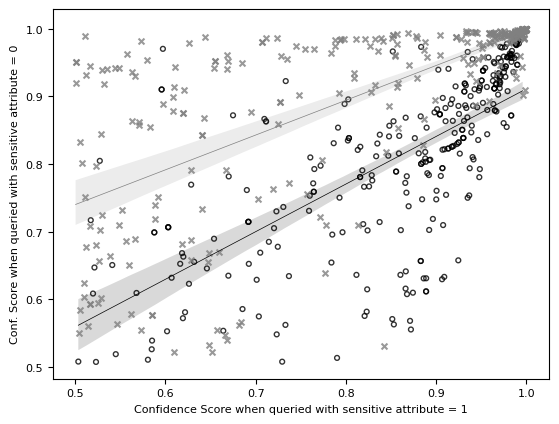

In [162]:
draw_conf_scatter_for_state()

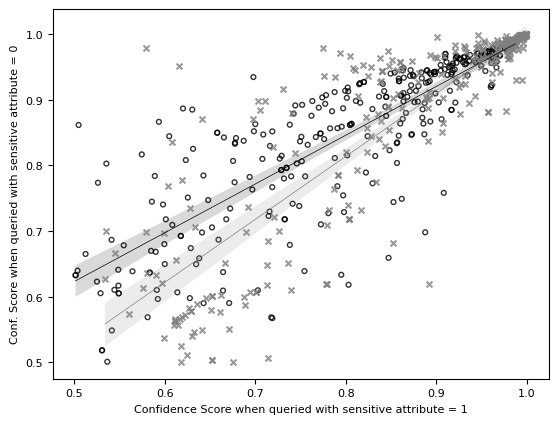

In [164]:
draw_conf_scatter_for_state(state_index=25)

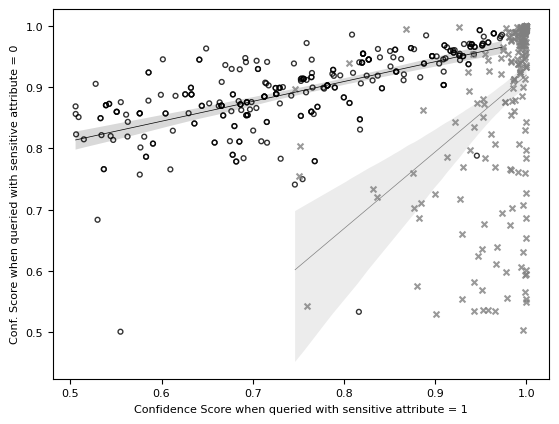

In [163]:
draw_conf_scatter_for_state(state_index=50)